# Project Part 1

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/sgeinitz/CS39AA-project/blob/main/project_part1.ipynb)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sgeinitz/CS39AA-project/blob/main/project_part1.ipynb)

This notebook is intended to serve as a template to complete Part 1 of the projects. Feel free to modify this notebook as needed, but be sure to have the two main parts, a) a introductory proposal section describing what it is your doing to do and where the dataset originates, and b) an exploratory analysis section that has the histograms, charts, tables, etc. that are the output from your exploratory analysis. 

__Note you will want to remove the text above, and in the markdown cells below, and replace it with your own text describing the dataset, task, exploratory steps, etc.__

## 1. Introduction/Background

_In this section you will describe (in English) the dataset you are using as well as the NLP problem it deals with. For example, if you are planning to use the Twitter Natural Disaster dataset, then you will describe what the data and where it came as if you were explaining it to someone who does not know anything about the data. You will then describe how this is a __text classification__ problem, and that the labels are binary (e.g. a tweet either refers to a genuine/real natural disaster, or it does not)._ 

_Overall, this should be about a paragraph of text that could be read by someone outside of our class, and they could still understand what it is your project is doing._ 

_Note that you should __not__ simply write one sentence stating, "This project is base on the Kaggle competition: Predicting Natural Disasters with Twitter._"

_If you are still looking for datasets to use, consider the following resources to explore text datasets._

* https://huggingface.co/datasets/
* https://www.kaggle.com/datasets
* https://data-flair.training/blogs/machine-learning-datasets/ 
* https://pytorch.org/text/stable/datasets.html
* https://github.com/niderhoff/nlp-datasets 
* https://medium.com/@ODSC/20-open-datasets-for-natural-language-processing-538fbfaf8e38 
* https://imerit.net/blog/25-best-nlp-datasets-for-machine-learning-all-pbm/ 


_If you instead are planning to do a more research-oriented or applied type of project, then describe what it is that you plan to do._

_If it is research, then what do you want to understand/explain better?_

_If it is applied, then what it is you plan to build?_ 

## 2. Exploratory Data Analysis

_You will now load the dataset and carry out some exploratory data analysis steps to better understand what text data looks like. See the examples from class on 10/. The following links provide some good resources of exploratory analyses of text data with Python._


* https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
* https://regenerativetoday.com/exploratory-data-analysis-of-text-data-including-visualization-and-sentiment-analysis/
* https://medium.com/swlh/text-summarization-guide-exploratory-data-analysis-on-text-data-4e22ce2dd6ad  
* https://www.kdnuggets.com/2019/05/complete-exploratory-data-analysis-visualization-text-data.html  


The goal for this project is to take IMDB reviews, and perform a sentiment analysis of them. Then if possible, use the reviews to predict possible ratings given by the user who wrote the review. 
 
So far the main input being used is going to be each review in the review column in the .csv which has been trimmed up a little in the code.
 
With the goal of getting a sentiment analysis out of this, I am attempting to get the simplified text data to vectorize for further proccessing of the text. The exact output I plan to get will be a column with each review's sentiment score/rating. Which I may be able to use to further train a model for predicting possible ratings left by those reviewers.

In [82]:
# import all of the python modules/packages you'll need here
import pandas as pd
import re
import nltk
#from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize
#from nltk.stem import PorterStemmer
#from nltk.stem import WordNetLemmatizer

from argparse import Namespace
from collections import Counter
from nltk.corpus import stopwords
import json
import os
import re
import string

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib
import matplotlib.pyplot as plt
# ...



Here is where I got started and was looking at the data I am working with. A couple graphs were used and tuned to get a goot cut off for the data compared to the full dataset.

   Unnamed: 0     Title  Global_Rating  \
0           0  The Menu            7.2   
1           1  The Menu            7.2   
2           2  The Menu            7.2   
3           3  The Menu            7.2   
4           4  The Menu            7.2   

                                              Review  
0  This is a movie that plays on something everyo...  
1  The hype for The Menu intrigued me. The review...  
2  This film was something else, I am genuinely s...  
3  Nice try, but the satire doesn't land in this ...  
4  "The Menu" offers a trailer spectacular enough...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     20000 non-null  int64  
 1   Title          20000 non-null  object 
 2   Global_Rating  20000 non-null  float64
 3   Review         20000 non-null  object 
dtypes: float64(1), int64(1), object(2)
memor

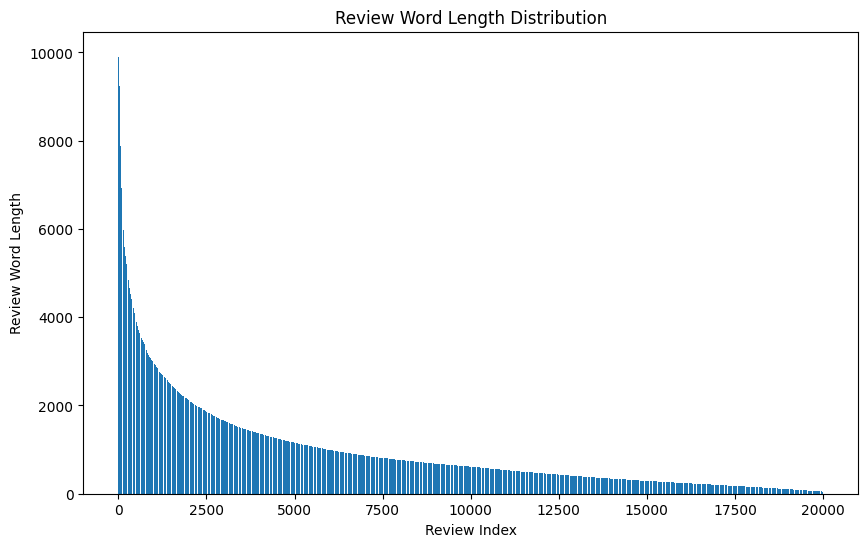

This graph shows that just of 10,000 reviews(half) are between 1,000 and 9,000 words long
This shows that 20% of the data contain reviews with between 1,000 and 14,000 characters in them


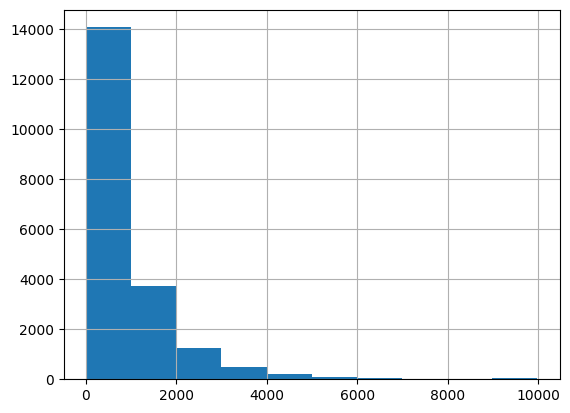

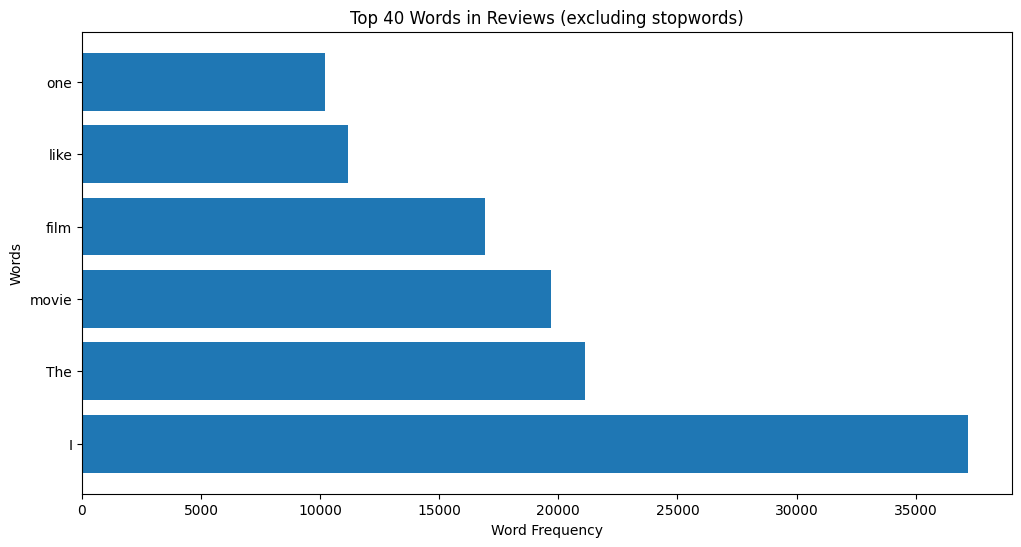

This graph shows that the most frequent words refer to filler words refering to the film itself.
Will test and see if results change after more text proccessing steps


In [83]:
df = pd.read_csv('/kaggle/input/imdb-rating-trimmed/IMDB_ratings2.csv', nrows=20000)

# Drop the un-needed columns
columns_to_remove = ['Gender', 'ID_Movie', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8']
df = df.drop(columns=columns_to_remove, axis=1)
# Save the DataFrame back to a new CSV file (if needed)
df.to_csv('IMDB_rating_backup.csv', index=False)

print(df.head())
print (df.info())

#Make text_length hold the word count for each review
df['text_length'] = df['Review'].apply(len)
print(df['text_length'].describe())
print(df['Review'].head())

# Create a bar graph of review lengths
plt.figure(figsize=(10, 6))
sorted_df = df.sort_values(by='text_length', ascending=False)
plt.bar(range(len(sorted_df)), sorted_df['text_length'], align='center')
plt.xlabel('Review Index')
plt.ylabel('Review Word Length')
plt.title('Review Word Length Distribution')
plt.show()
print('This graph shows that just of 10,000 reviews(half) are between 1,000 and 9,000 words long')

#Data Exploration ideas from https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools

df['Review'].str.len().hist()

print('This shows that 20% of the data contain reviews with between 1,000 and 14,000 characters in them')

# Define a function to calculate text length
def calculate_text_length(text):
    words = re.findall(r'\w+', text)
    return len(words)

# Apply the text length calculation to create a new column
#df['text_length'] = df['Review'].apply(calculate_text_length)

for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

plt.figure(figsize=(12, 6))
plt.barh(x, y)
plt.xlabel('Word Frequency')
plt.ylabel('Words')
plt.title('Top 40 Words in Reviews (excluding stopwords)')
plt.show()

print('This graph shows that the most frequent words refer to filler words refering to the film itself.\nWill test and see if results change after more text proccessing steps')

The Vocabulary

In [84]:
class Vocabulary(object):
    #Proccesses the text, and tracks vocabulary for mapping
    
    def _init_(self, token_to_idx=None, add_unk=True,unk_token="<UNK>"):
        #token_to_idx (dict): a pre-existing map of tokens to indices
        #add_unk (bool): a flag that indicates whether to add the UNK token
        #unk_token (str): the UNK token to add into the Vocabulary
        
        
        if token_to_idx == None:
            token_to_idx = {}
        self._token_to_idx = token_to_idx
        self._idx_to_token ={idx:token for token, idx in self._token_to_idx.items()}
        self._add_unk = add_unk
        self._unk_token = unk_token
        self.unk_index = -1
        if add_unk:
            self.unk_index = self.add_token(unk_token)
    def to_serialize(self):
        #Returns a serializable dictionary
        return {'token_to_idx': self._token_to_idx, 
                'add_unk': self._add_unk, 
                'unk_token': self._unk_token}
    @classmethod
    def fro_serializable(cls,content):
        return cls(**contents)
    
    def add_token(self,token):
        #update mapping dictionary based on token provided
        
        if token in self._token_t_idx:
            index = self._token_to_idx[token]
        else:
            index=len(self._token_to_idx[token])
            self._token_to_idx[token] = index
            self._idx_to_token[index] = token
        return index
    def add_many(self, tokens):
        #adds list of tokens to vocab
        #inputs tokens(list) and returns index(list)/indices of tokens
        return[self.add_token(token)for token in tokens]
    
    def lookup_token(self,token):
        #Get the indexx associated with a token, or UNK_index if token not present
        if self.unk_index >= 0:
            return self._token_to_idx.get(token,self.unk_index)
        else:
            return self.token_to_idx[token]
        
    def lookup_index(self, index):
        #Takes index and returns the token associated with it
        if index not in self._idx_to_token:
            raise KeyError("the index (%d) is not in the Vocabulary" % index)
        return self._idx_to_token[index]
    
    def __str__(self):
        return"<Vocabulary(size=%d)>" % len(self)
    
    def __len__(self):
        return len(self._token_to_idx)






#...
#class Vocabulary(objective):
 #   def _init_(self, token_to_idx=None, add_unk+True, unk_token="<UNK>"):
 #       if token_to_idx is None:
 #           token_to_idx = {}
 #       self.token_to_idx = token_to_idx

The Vectorizor

In [85]:
class ReviewVectorizer(object):
    """ The Vectorizer which coordinates the Vocabularies and puts them to use"""
    def __init__(self, review_vocab, rating_vocab):
        """
        Args:
            review_vocab (Vocabulary): maps words to integers
            rating_vocab (Vocabulary): maps class labels to integers
        """
        self.review_vocab = review_vocab
        self.rating_vocab = rating_vocab

    def vectorize(self, review):
        """Create a collapsed one-hit vector for the review
        
        Args:
            review (str): the review 
        Returns:
            one_hot (np.ndarray): the collapsed one-hot encoding 
        """
        one_hot = np.zeros(len(self.review_vocab), dtype=np.float32)
        
        for token in review.split(" "):
            if token not in string.punctuation:
                one_hot[self.review_vocab.lookup_token(token)] = 1

        return one_hot

    @classmethod
    def from_dataframe(cls, review_df, cutoff=20):
        """Instantiate the vectorizer from the dataset dataframe
        
        Args:
            review_df (pandas.DataFrame): the review dataset
            cutoff (int): the parameter for frequency-based filtering
        Returns:
            an instance of the ReviewVectorizer
        """
        review_vocab = Vocabulary(add_unk=True)
        rating_vocab = Vocabulary(add_unk=False)
        stop_words = set(stopwords.words('english'))
        
        # Add ratings
        for rating in sorted(set(review_df.rating)):
            rating_vocab.add_token(rating)

        # Add top words if count > provided count
        word_counts = Counter()
        for review in review_df.review:
            for word in review.split(" "):
                if word not in string.punctuation:
                    word_counts[word] += 1
               
        for word, count in word_counts.items():
            if count > cutoff and word not in stop_words:
                review_vocab.add_token(word)

        return cls(review_vocab, rating_vocab)

    @classmethod
    def from_serializable(cls, contents):
        """Instantiate a ReviewVectorizer from a serializable dictionary
        
        Args:
            contents (dict): the serializable dictionary
        Returns:
            an instance of the ReviewVectorizer class
        """
        review_vocab = Vocabulary.from_serializable(contents['review_vocab'])
        rating_vocab =  Vocabulary.from_serializable(contents['rating_vocab'])

        return cls(review_vocab=review_vocab, rating_vocab=rating_vocab)

    def to_serializable(self):
        #create serializable dictionary for caching
        return {'review_vocab': self.review_vocab.to_serializable(),
                'rating_vocab': self.rating_vocab.to_serializable()}

The Dataset

In [86]:
class ReviewDataset(Dataset):
    def __init__(self, review_df, vectorizer):
        """
        Args:
            review_df (pandas.DataFrame): the dataset
            vectorizer (ReviewVectorizer): vectorizer instantiated from dataset
        """
        self.review_df = review_df
        self._vectorizer = vectorizer

        self.train_df = self.review_df[self.review_df.split=='train']
        self.train_size = len(self.train_df)

        self.val_df = self.review_df[self.review_df.split=='val']
        self.validation_size = len(self.val_df)

        self.test_df = self.review_df[self.review_df.split=='test']
        self.test_size = len(self.test_df)

        self._lookup_dict = {'train': (self.train_df, self.train_size),
                             'val': (self.val_df, self.validation_size),
                             'test': (self.test_df, self.test_size)}

        self.set_split('train')

    @classmethod
    def load_dataset_and_make_vectorizer(cls, review_csv):
        """Load dataset and make a new vectorizer from scratch
        
        Args:
            review_csv (str): location of the dataset
        Returns:
            an instance of ReviewDataset
        """
        review_df = pd.read_csv(review_csv)
        train_review_df = review_df[review_df.split=='train']
        return cls(review_df, ReviewVectorizer.from_dataframe(train_review_df))
    
    @classmethod
    def load_dataset_and_load_vectorizer(cls, review_csv, vectorizer_filepath):
        """Load dataset and the corresponding vectorizer. 
        Used in the case in the vectorizer has been cached for re-use
        
        Args:
            review_csv (str): location of the dataset
            vectorizer_filepath (str): location of the saved vectorizer
        Returns:
            an instance of ReviewDataset
        """
        review_df = pd.read_csv(review_csv)
        vectorizer = cls.load_vectorizer_only(vectorizer_filepath)
        return cls(review_df, vectorizer)

    @staticmethod
    def load_vectorizer_only(vectorizer_filepath):
        """a static method for loading the vectorizer from file
        
        Args:
            vectorizer_filepath (str): the location of the serialized vectorizer
        Returns:
            an instance of ReviewVectorizer
        """
        with open(vectorizer_filepath) as fp:
            return ReviewVectorizer.from_serializable(json.load(fp))

    def save_vectorizer(self, vectorizer_filepath):
        """saves the vectorizer to disk using json
        
        Args:
            vectorizer_filepath (str): the location to save the vectorizer
        """
        with open(vectorizer_filepath, "w") as fp:
            json.dump(self._vectorizer.to_serializable(), fp)

    def get_vectorizer(self):
        """ returns the vectorizer """
        return self._vectorizer

    def set_split(self, split="train"):
        """ selects the splits in the dataset using a column in the dataframe 
        
        Args:
            split (str): one of "train", "val", or "test"
        """
        self._target_split = split
        self._target_df, self._target_size = self._lookup_dict[split]

    def __len__(self):
        return self._target_size

    def __getitem__(self, index):
        """the primary entry point method for PyTorch datasets
        
        Args:
            index (int): the index to the data point 
        Returns:
            a dictionary holding the data point's features (x_data) and label (y_target)
        """
        row = self._target_df.iloc[index]

        review_vector = \
            self._vectorizer.vectorize(row.review)

        rating_index = \
            self._vectorizer.rating_vocab.lookup_token(row.rating)

        return {'x_data': review_vector,
                'y_target': rating_index}

    def get_num_batches(self, batch_size):
        """Given a batch size, return the number of batches in the dataset
        
        Args:
            batch_size (int)
        Returns:
            number of batches in the dataset
        """
        return len(self) // batch_size  
    
def generate_batches(dataset, batch_size, shuffle=True,
                     drop_last=True, device="cpu"):
    """
    A generator function which wraps the PyTorch DataLoader. It will 
      ensure each tensor is at the correct device location.
    """
    dataloader = DataLoader(dataset=dataset, batch_size=batch_size,
                            shuffle=shuffle, drop_last=drop_last)

    for data_dict in dataloader:
        out_data_dict = {}
        for name, tensor in data_dict.items():
            out_data_dict[name] = data_dict[name].to(device)
        yield out_data_dict

Prep-work

0    [movie, plays, something, everyone, come, acro...
1    [hype, menu, intrigued, ., reviews, celebrated...
2    [film, something, else, ,, genuinely, stumped,...
3    [nice, try, ,, satire, n't, land, film, skewer...
4    [``, menu, '', offers, trailer, spectacular, e...
Name: processed_text, dtype: object


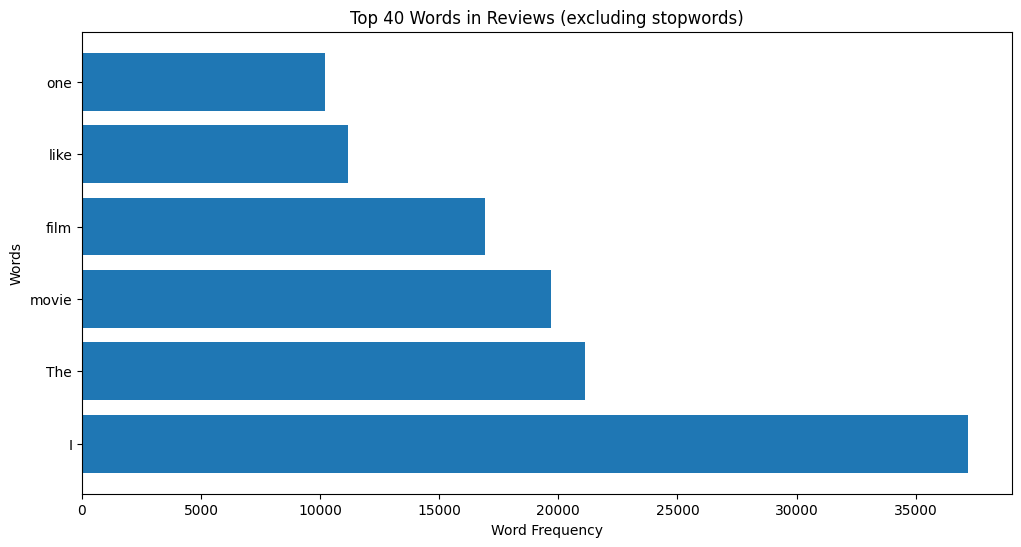

In [87]:

def preprocess_text(text):
    #Set all text to lowercase
    text=text.lower()
    #Remove anything not a letter of the alphabet or a space, i.e, empty string replaces it
    text + re.sub(r'[^a-zA-Z\s]','', text)
    tokens = word_tokenize(text)
    #Remove stop words from tokens
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    #-----
    '''
    w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
    lemmatizer = nltk.stem.WordNetLemmatizer()

    def lemmatize_text(text):
        return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

    df = pd.DataFrame(['this was cheesy', 'she likes these books', 'wow this is great'], columns=['text'])
    df['text_lemmatized'] = df.text.apply(lemmatize_text)
    '''
    
    
    # Apply stemming using the Porter Stemmer
    #stemmer = PorterStemmer()
    #stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

    #Apply lemmatization using the WordNet Lemmatizer
    #lemmatizer = WordNetLemmatizer()
    #lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    #Join the tokens back into a cleaned and preprocessed text
    #-cleaned_text = ' '.join(lemmatized_tokens)

    return filtered_tokens
df['processed_text'] = df['Review'].apply(preprocess_text)

# Save the DataFrame with processed text back to a new CSV file
df.to_csv("preprocessed_sentiment_data.csv", index=False)
print(df['processed_text'].head())
#print(df['Review'].head())
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

plt.figure(figsize=(12, 6))
plt.barh(x, y)
plt.xlabel('Word Frequency')
plt.ylabel('Words')
plt.title('Top 40 Words in Reviews (excluding stopwords)')
plt.show()




args = Namespace(
    #Input data file(after pre-proccessing)
    input_data_path = '~/data/',
    review_csv = 'preprocessed_sentiment_data.csv',
    model_state_file = 'model.pth',
    #Output data and path info
    save_dir = '~/data/Project1/',
    vectorize_file = 'vectorizer.json',
    #Training parameters
    batch_size = 500,
    early_stopping_criteria = 3,
    learning_rate = 0.001,
    num_epochs = 6,
    seed = 42,
    # Runtime options
    catch_keyboard_interrupt=True,
    cuda=False,
    expand_filepaths_to_save_dir=True,
    reload_from_files=False,
)
    

Initialization

In [88]:
'''
if args.reload_from_files:
    # training from a checkpoint
    print("Loading dataset and vectorizer")
    dataset = ReviewDataset.load_dataset_and_load_vectorizer(args.review_csv,
                                                            args.vectorizer_file)
else:
    print("Loading dataset and creating vectorizer")
    # create dataset and vectorizer
    dataset = ReviewDataset.load_dataset_and_make_vectorizer(args.review_csv)
    dataset.save_vectorizer(args.vectorizer_file)    
vectorizer = dataset.get_vectorizer()
'''

'\nif args.reload_from_files:\n    # training from a checkpoint\n    print("Loading dataset and vectorizer")\n    dataset = ReviewDataset.load_dataset_and_load_vectorizer(args.review_csv,\n                                                            args.vectorizer_file)\nelse:\n    print("Loading dataset and creating vectorizer")\n    # create dataset and vectorizer\n    dataset = ReviewDataset.load_dataset_and_make_vectorizer(args.review_csv)\n    dataset.save_vectorizer(args.vectorizer_file)    \nvectorizer = dataset.get_vectorizer()\n'